# Upload the dataset and `self_utils.py` file in the workspace

# Credit Card Fraud Detection

## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import self_utils as su
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

## Importing the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Checking the discrepencies in the data and performing exploratory data analysis

In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
len(df)

284807

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Checking the distribution of data

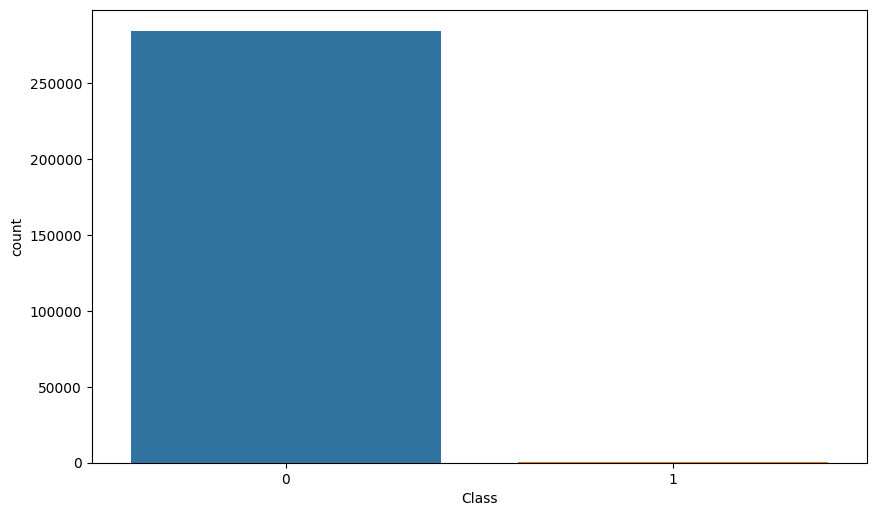

In [ ]:
plt.figure(dpi=100, figsize=(10,6))
sns.countplot(data=df, x='Class')

### Checking the effect of `Amount` and `Time` columns of the dataset on `Class`

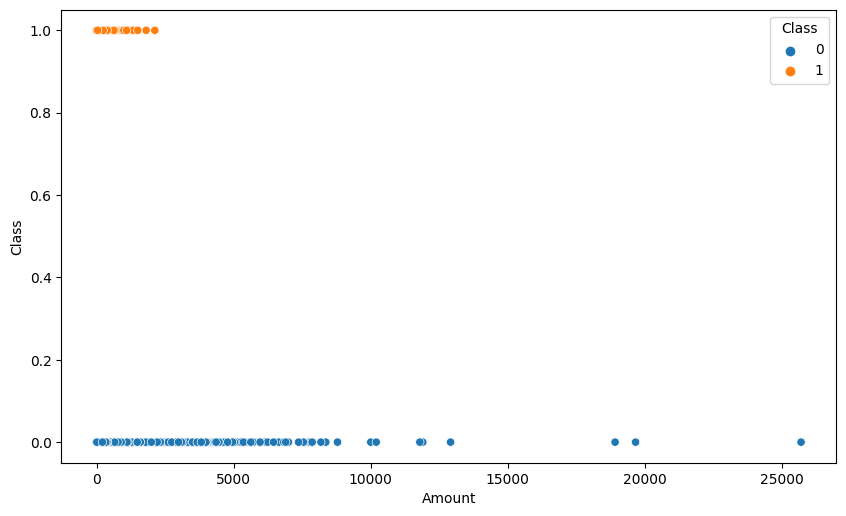

In [ ]:
plt.figure(dpi=100, figsize=(10,6))
sns.scatterplot(data=df, x='Amount', y='Class', hue='Class')

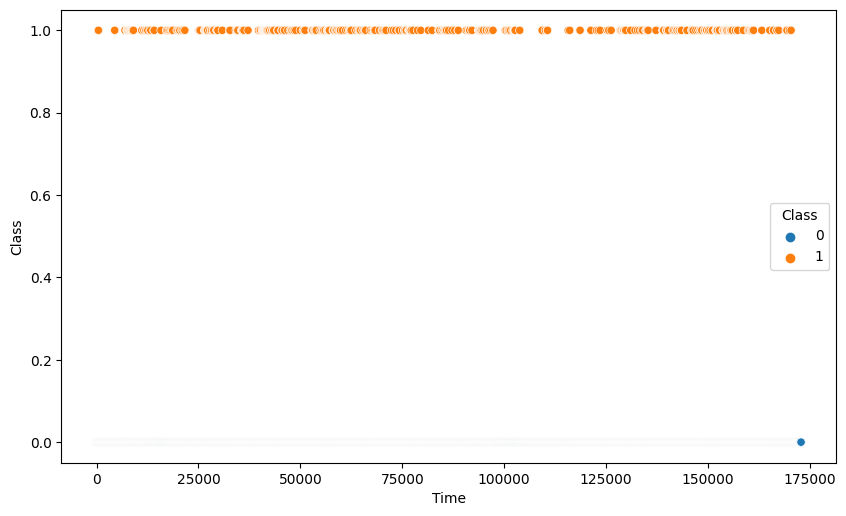

In [ ]:
plt.figure(dpi=100, figsize=(10,6))
sns.scatterplot(data=df, x='Time', y='Class', hue='Class', )

### Dropping the non impactful columns

In [ ]:
df = df.drop(['Time'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Scaling `Amount` feature for better results

In [ ]:
sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


### Cleaning the dataset by removing any `NaN` or `infinite` values

In [ ]:
df = su.clean_dataset(df)

### Checking the Distribution of various features of our dataset

<Figure size 432x288 with 0 Axes>

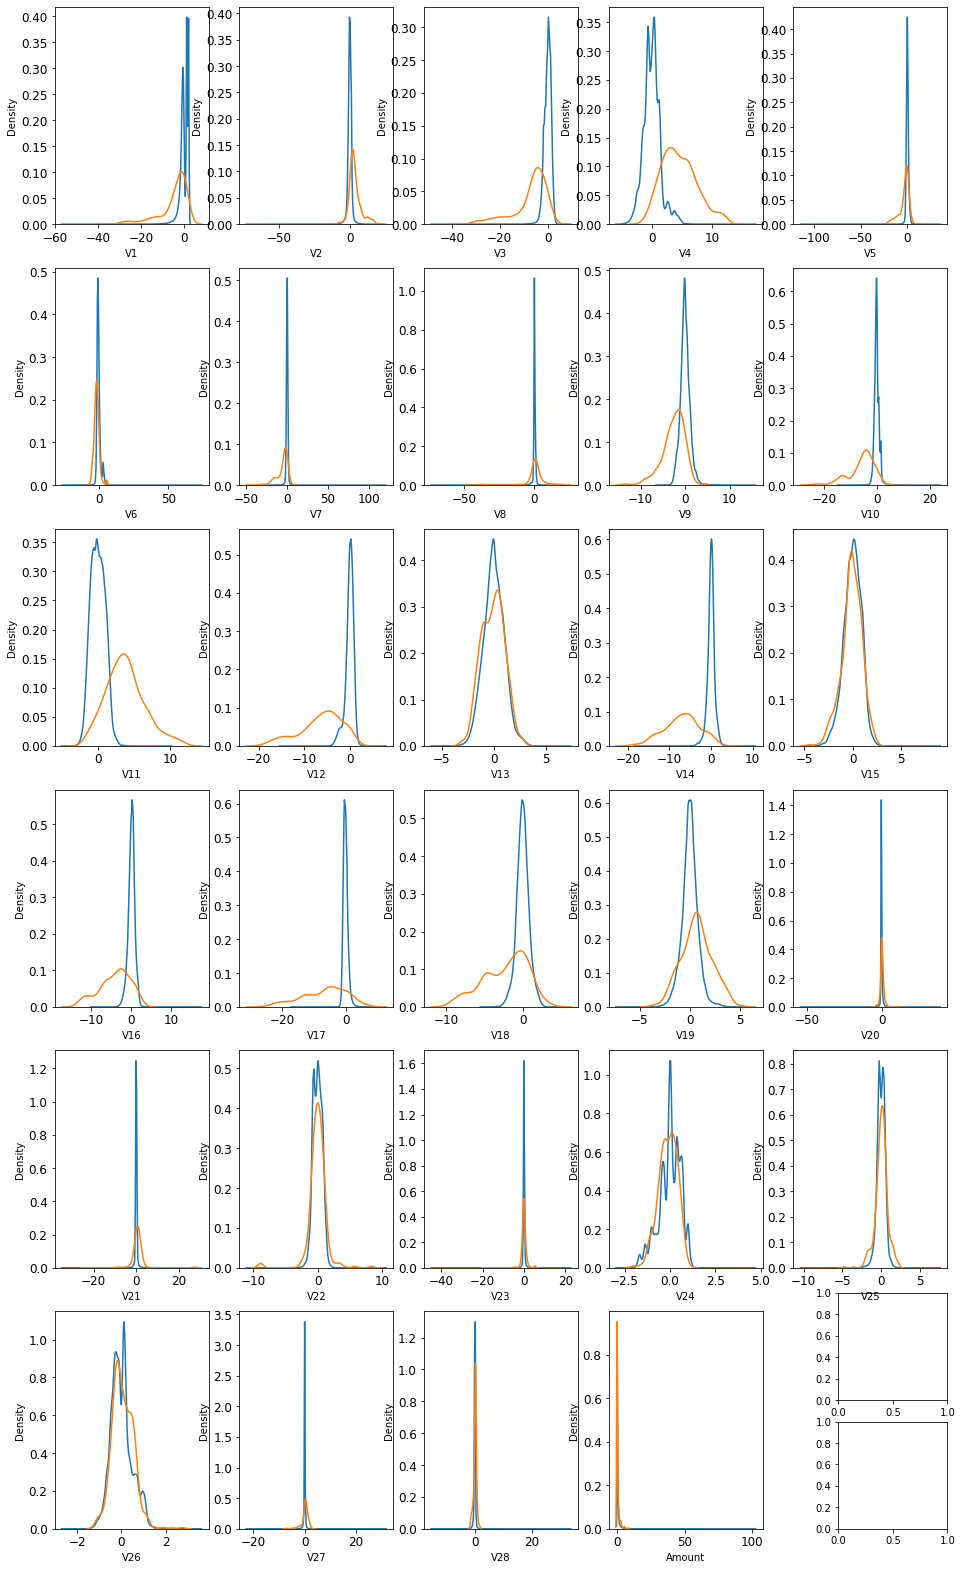

In [ ]:
columns = list(df.columns.values)
columns.remove("Class")
n = 1
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(12,7,figsize=(16,28))

for i in columns:
    plt.subplot(6,5,n)
    sns.kdeplot(t0[i],label="0")
    sns.kdeplot(t1[i],label="1")
    plt.xlabel(i, fontsize=10)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    n =n + 1
plt.show();

## Preparing the dataset for training

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

### Splitting the dataset into training and validation sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.4)
len(X_train)

170884

### Checking skewness and using a transformer to mitigate it

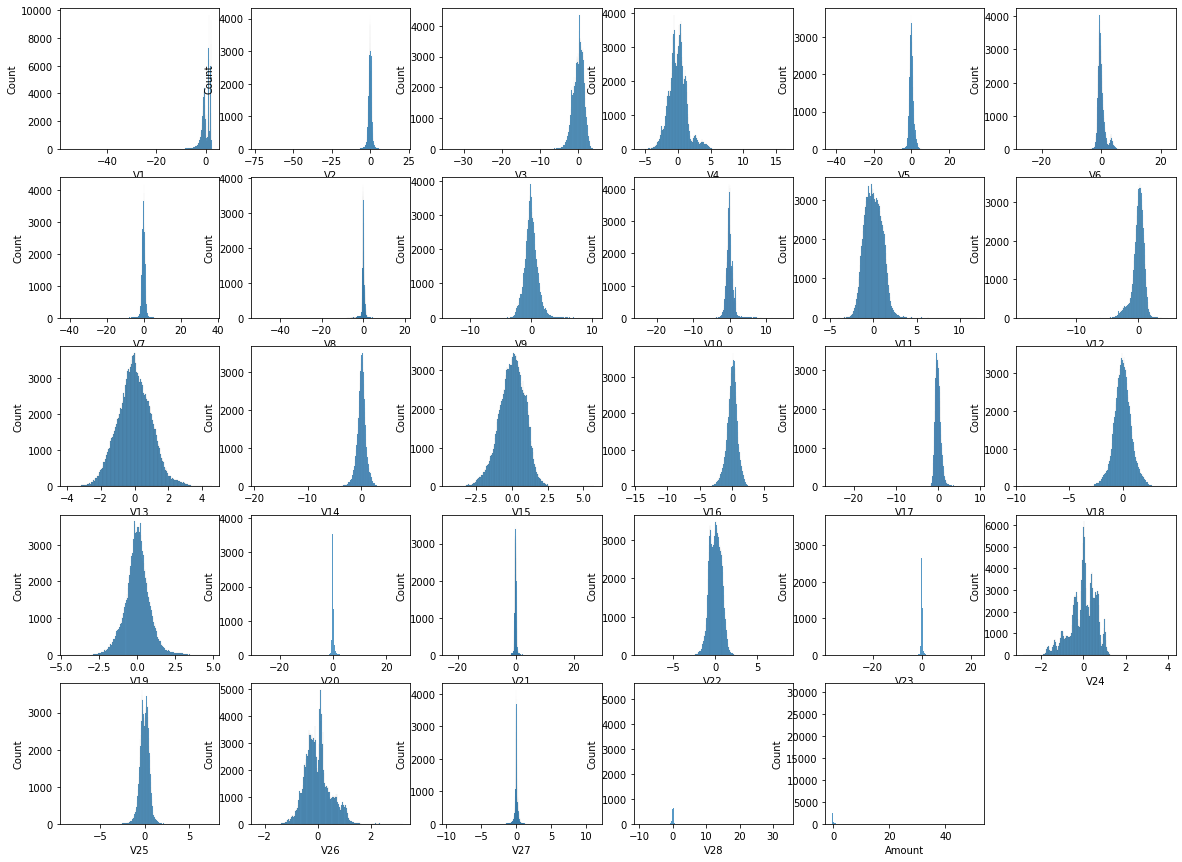

In [ ]:
col = X_train.columns
plt.figure(figsize=(20,15))
n=1
for i in col:
    plt.subplot(5,6, n)
    sns.histplot(data = X_train[i])
    n += 1
plt.show()
plt.rcParams.update({'figure.max_open_warning': 0})

In [ ]:
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
X_train[col] = pt.fit_transform(X_train)
X_test[col] = pt.transform(X_test)

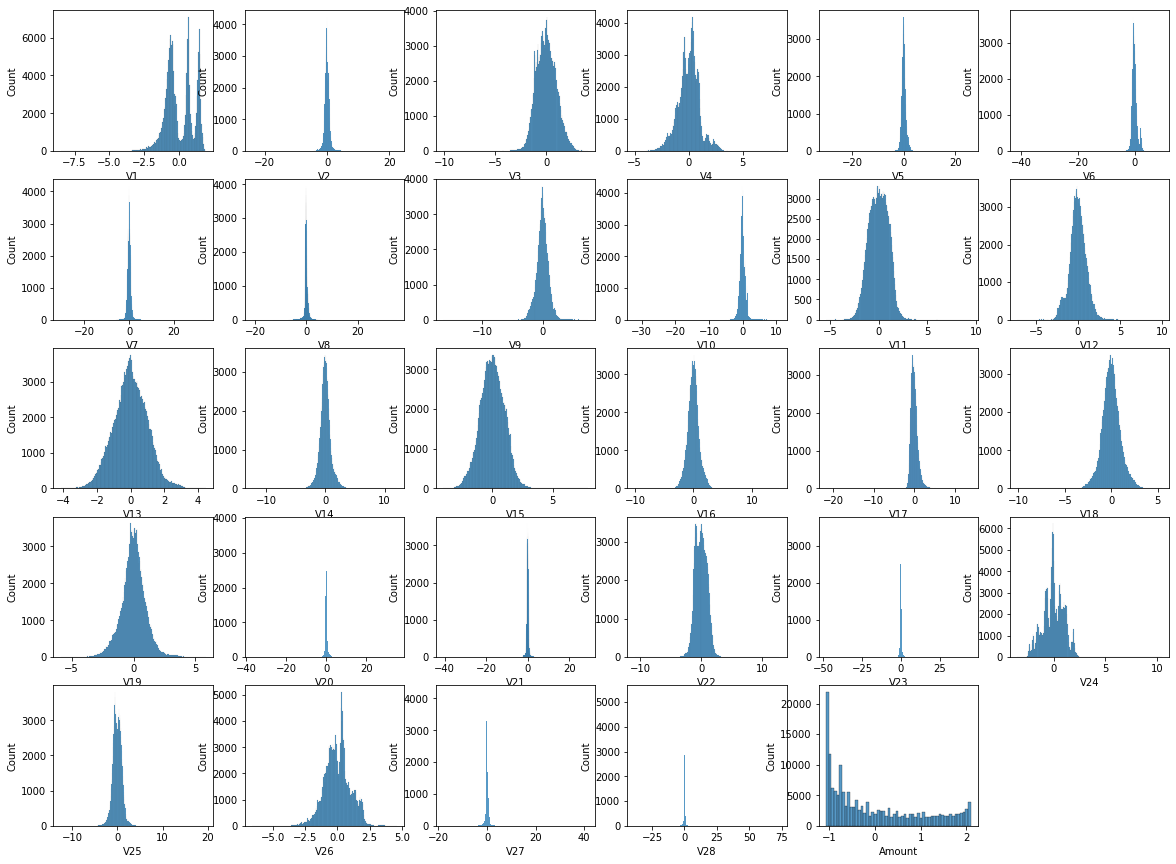

In [ ]:
col = X_train.columns
plt.figure(figsize=(20,15))
n=1
for i in col:
    plt.subplot(5,6, n)
    sns.histplot(data = X_train[i])
    n += 1
plt.show()
plt.rcParams.update({'figure.max_open_warning': 0})

### Creating synthetic data using `SMOTE` (Since the dataset is imbalanced)

In [ ]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)
print("Before performing smote : ", Counter(y_train))
print("After performing smote : ", Counter(y_train_smote))

Before performing smote :  Counter({0.0: 170580, 1.0: 304})
After performing smote :  Counter({0.0: 170580, 1.0: 170580})


## Testing various models on the dataset

### 1.1. Logistic Regression without synthetic data

In [ ]:
model_ws_1 = LogisticRegression(solver='lbfgs', max_iter=1000)
model_ws_1.fit(X_train, y_train)
y_pred_ws_1 = model_ws_1.predict(X_test)
acc_ws_1 = accuracy_score(y_test, y_pred_ws_1)
acc_ws_1

0.9992363262905647

#### Confusion Matrix

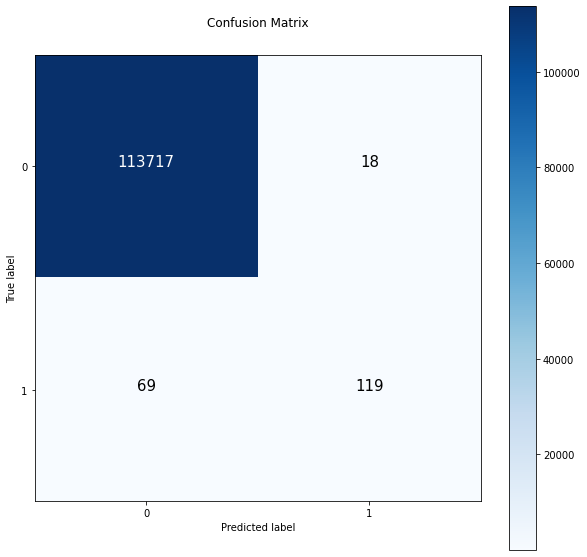

In [ ]:
su.make_confusion_matrix(y_test, y_pred_ws_1)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res11 = su.calculate_results(y_test, y_pred_ws_1)
res11

{'accuracy': 99.92363262905647,
 'f1': 0.9991764928671306,
 'precision': 0.9991777796981207,
 'recall': 0.9992363262905647}

### 1.2 Logistic Regression with synthetic data

In [ ]:
model_s_1 = LogisticRegression(solver='lbfgs', max_iter=1000)
model_s_1.fit(X_train_smote, y_train_smote)
y_pred_s_1 = model_s_1.predict(X_test)
acc_s_1 = accuracy_score(y_test, y_pred_s_1)
acc_s_1

0.9682680406941531

#### Confusion Matrix

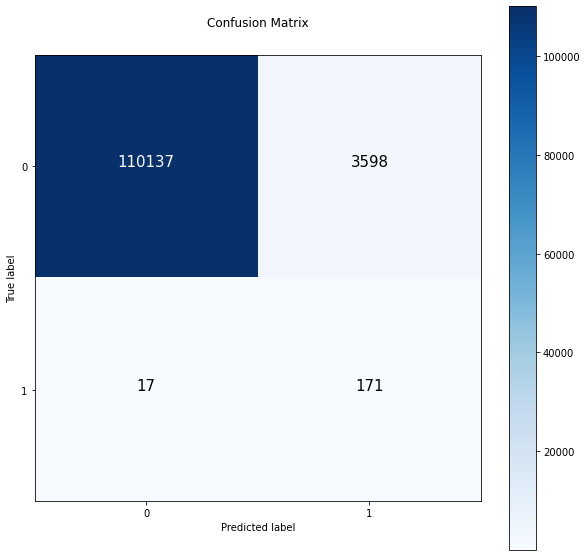

In [ ]:
su.make_confusion_matrix(y_test, y_pred_s_1)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res12 = su.calculate_results(y_test, y_pred_s_1)
res12

{'accuracy': 96.8268040694153,
 'f1': 0.9823726425289926,
 'precision': 0.9982705593241589,
 'recall': 0.9682680406941531}

### 2.1. Decision Tree Classifier without synthetic data

In [ ]:
model_ws_2 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_ws_2.fit(X_train, y_train)
y_pred_ws_2 = model_ws_2.predict(X_test)
acc_ws_2 = accuracy_score(y_test, y_pred_ws_2)
acc_ws_2

0.9994996620524389

#### Confusion Matrix

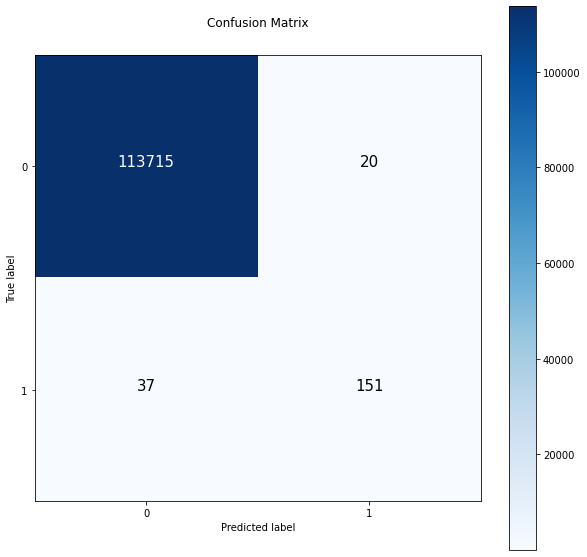

In [ ]:
su.make_confusion_matrix(y_test, y_pred_ws_2)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res21 = su.calculate_results(y_test, y_pred_ws_2)
res21

{'accuracy': 99.9499662052439,
 'f1': 0.9994878343057972,
 'precision': 0.9994822575378066,
 'recall': 0.9994996620524389}

### 2.2. Decision Tree Classifier with synthetic data

In [ ]:
model_s_2 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_s_2.fit(X_train_smote, y_train_smote)
y_pred_s_2 = model_s_2.predict(X_test)
acc_s_2 = accuracy_score(y_test, y_pred_s_2)
acc_s_2

0.9713139576731652

#### Confusion Matrix

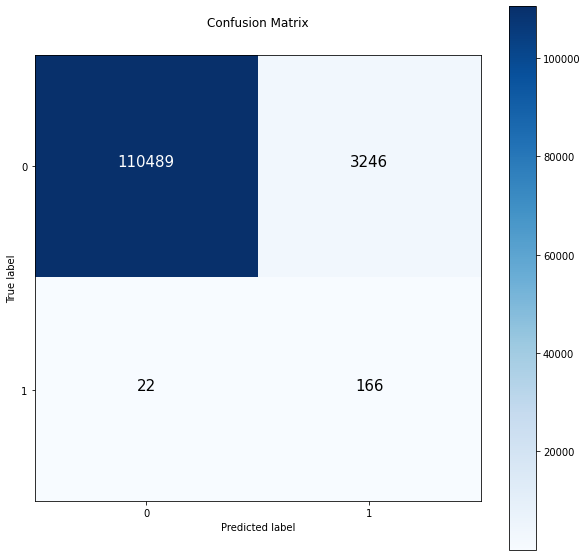

In [ ]:
su.make_confusion_matrix(y_test, y_pred_s_2)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res22 = su.calculate_results(y_test, y_pred_s_2)
res22

{'accuracy': 97.13139576731652,
 'f1': 0.9839527193683296,
 'precision': 0.998231302925277,
 'recall': 0.9713139576731652}

### 3.1. Naive Bayes Classifier without synthetic data

In [ ]:
model_ws_3 = GaussianNB()
model_ws_3.fit(X_train, y_train)
y_pred_ws_3 = model_ws_3.predict(X_test)
acc_ws_3 = accuracy_score(y_test, y_pred_ws_3)
acc_ws_3

0.9776340159581471

#### Confusion Matrix

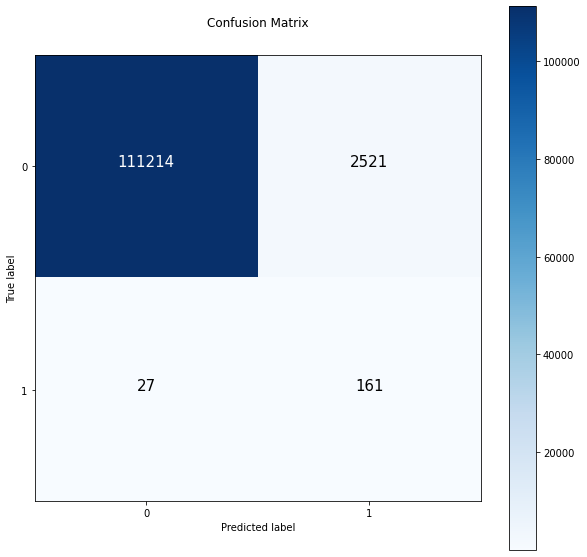

In [ ]:
su.make_confusion_matrix(y_test, y_pred_ws_3)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res31 = su.calculate_results(y_test, y_pred_ws_3)
res31

{'accuracy': 97.76340159581471,
 'f1': 0.9872279486516491,
 'precision': 0.9982065103042518,
 'recall': 0.9776340159581471}

### 3.2. Naive Bayes Classifier with synthetic data

In [ ]:
model_s_3 = GaussianNB()
model_s_3.fit(X_train_smote, y_train_smote)
y_pred_s_3 = model_s_3.predict(X_test)
acc_s_3 = accuracy_score(y_test, y_pred_s_3)
acc_s_3

0.9738244252696997

#### Confusion Matrix

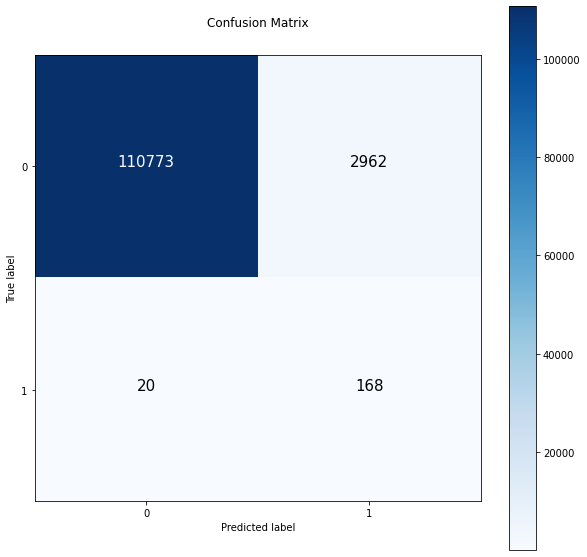

In [ ]:
su.make_confusion_matrix(y_test, y_pred_s_3)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res32 = su.calculate_results(y_test, y_pred_s_3)
res32

{'accuracy': 97.38244252696997,
 'f1': 0.9852575980076678,
 'precision': 0.9982581186796419,
 'recall': 0.9738244252696997}

### 4.1. K Nearest Neighbors Classifier without synthetic data

In [ ]:
model_ws_4 = KNeighborsClassifier(n_neighbors=3)
model_ws_4.fit(X_train, y_train)
y_pred_ws_4 = model_ws_4.predict(X_test)
acc_ws_4 = accuracy_score(y_test, y_pred_ws_4)
acc_ws_4

0.9996488856508343

#### Confusion Matrix

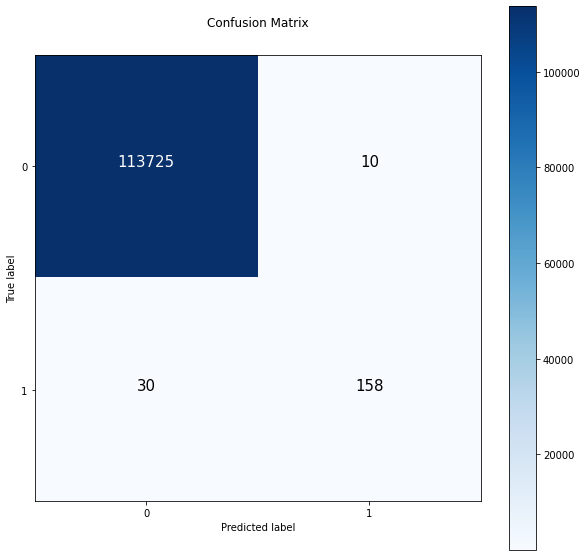

In [ ]:
su.make_confusion_matrix(y_test, y_pred_ws_4)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res41 = su.calculate_results(y_test, y_pred_ws_4)
res41

{'accuracy': 99.96488856508343,
 'f1': 0.9996390383224936,
 'precision': 0.9996384821177722,
 'recall': 0.9996488856508343}

### 4.2. K Nearest Neighbors Classifier with synthetic data

In [ ]:
model_s_4 = KNeighborsClassifier(n_neighbors=3)
model_s_4.fit(X_train_smote, y_train_smote)
y_pred_s_4 = model_s_4.predict(X_test)
acc_s_4 = accuracy_score(y_test, y_pred_s_4)
acc_s_4

0.9982883175478174

#### Confusion Matrix

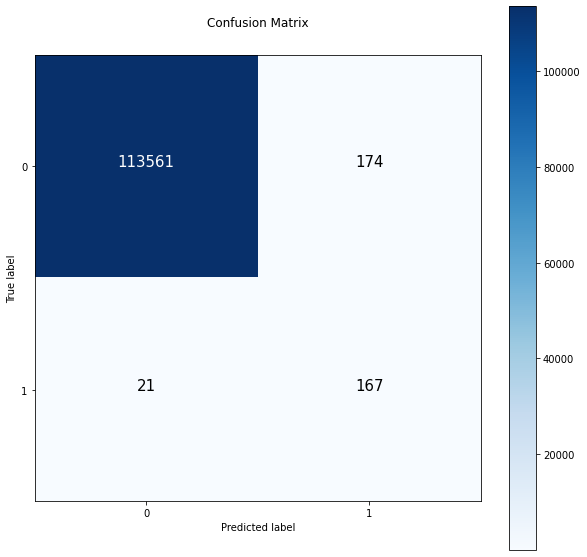

In [ ]:
su.make_confusion_matrix(y_test, y_pred_s_4)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res42 = su.calculate_results(y_test, y_pred_s_4)
res42

{'accuracy': 99.82883175478175,
 'f1': 0.9985352721458867,
 'precision': 0.9989733600177202,
 'recall': 0.9982883175478174}

### 5.1. Random Forest Classifier without synthetic data

In [ ]:
model_ws_5 = RandomForestClassifier(max_depth=5, criterion='entropy')
model_ws_5.fit(X_train, y_train)
y_pred_ws_5 = model_ws_5.predict(X_test)
acc_ws_5 = accuracy_score(y_test, y_pred_ws_5)
acc_ws_5

0.9995874406397304

#### Confusion Matrix

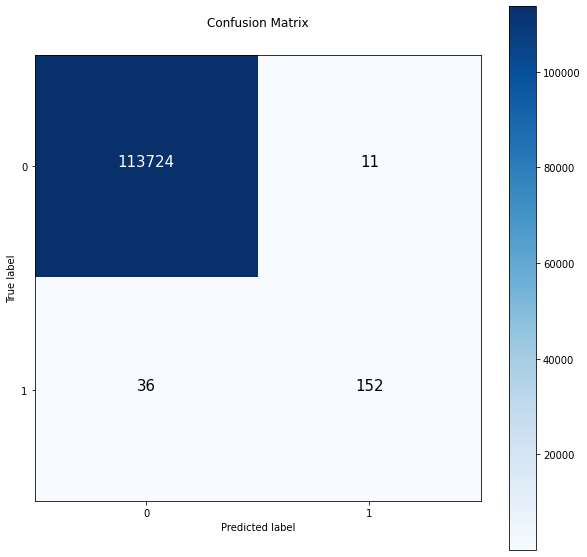

In [ ]:
su.make_confusion_matrix(y_test, y_pred_ws_5)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res51 = su.calculate_results(y_test, y_pred_ws_5)
res51

{'accuracy': 99.95874406397304,
 'f1': 0.9995727710234154,
 'precision': 0.9995727008139532,
 'recall': 0.9995874406397304}

### 5.2. Random Forest Classifier with synthetic data

In [ ]:
model_s_5 = RandomForestClassifier(max_depth=5, criterion='entropy')
model_s_5.fit(X_train_smote, y_train_smote)
y_pred_s_5 = model_s_5.predict(X_test)
acc_s_5 = accuracy_score(y_test, y_pred_s_5)
acc_s_5

0.994794729773619

#### Confusion Matrix

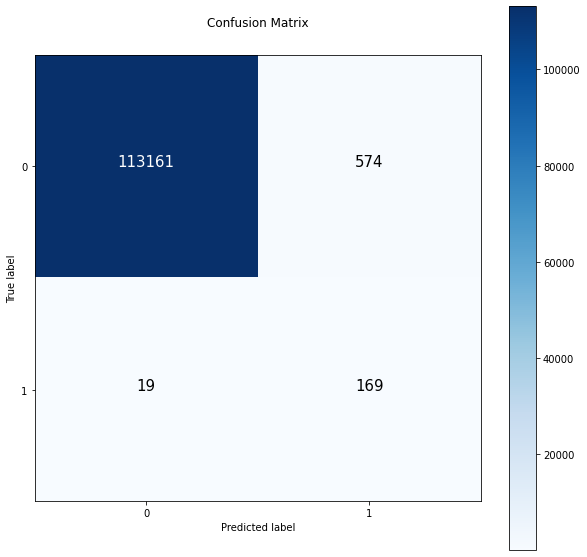

In [ ]:
su.make_confusion_matrix(y_test, y_pred_s_5)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res52 = su.calculate_results(y_test, y_pred_s_5)
res52

{'accuracy': 99.47947297736191,
 'f1': 0.9963398812918721,
 'precision': 0.9985575222423041,
 'recall': 0.994794729773619}

### 6.1. Support Vector Classifier without synthetic data

In [ ]:
model_ws_6 = SVC()
model_ws_6.fit(X_train, y_train)
y_pred_ws_6 = model_ws_6.predict(X_test)
acc_ws_6 = accuracy_score(y_test, y_pred_ws_6)
acc_ws_6

0.9994645506175224

#### Confusion Matrix


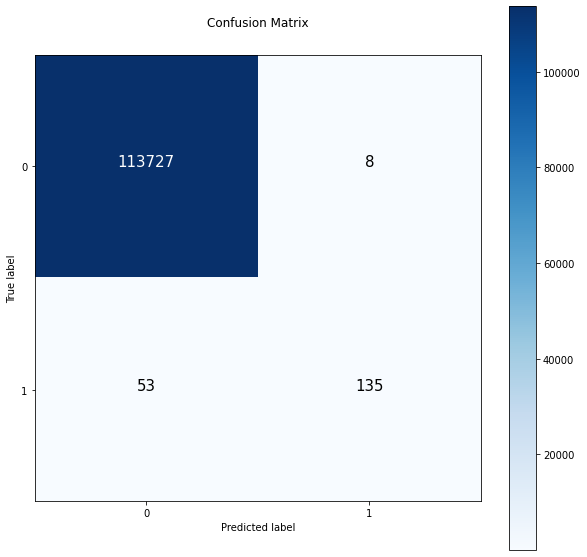

In [ ]:
su.make_confusion_matrix(y_test, y_pred_ws_6)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res61 = su.calculate_results(y_test, y_pred_ws_6)
res61

{'accuracy': 99.94645506175223,
 'f1': 0.9994282059539296,
 'precision': 0.9994426365087574,
 'recall': 0.9994645506175224}

### 6.2. Support Vector Classifier with synthetic data

In [ ]:
model_s_6 = SVC()
model_s_6.fit(X_train_smote, y_train_smote)
y_pred_s_6 = model_s_6.predict(X_test)
acc_s_6 = accuracy_score(y_test, y_pred_s_6)
acc_s_6

0.9838399620796503

#### Confusion Matrix

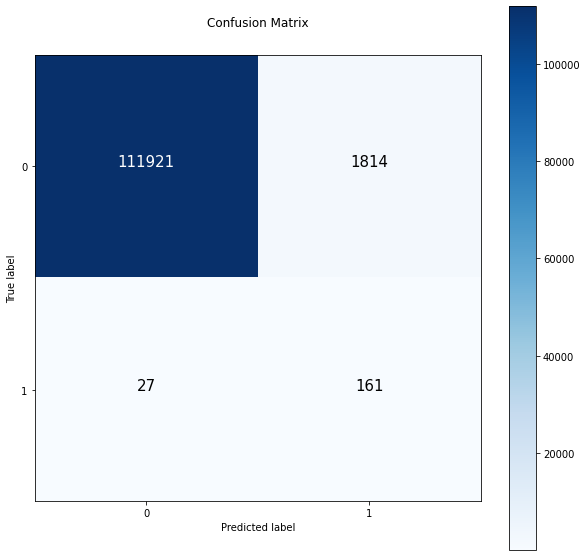

In [ ]:
su.make_confusion_matrix(y_test, y_pred_s_6)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res62 = su.calculate_results(y_test, y_pred_s_6)
res62

{'accuracy': 98.38399620796503,
 'f1': 0.9904514309198762,
 'precision': 0.9982435028472977,
 'recall': 0.9838399620796503}

### 7.1. XGBoost Classifier without synthetic data

In [ ]:
model_ws_7 = XGBClassifier()
model_ws_7.fit(X_train, y_train)
y_pred_ws_7 = model_ws_7.predict(X_test)
acc_ws_7 = accuracy_score(y_test, y_pred_ws_7)
acc_ws_7

0.999561107063543

#### Confusion Matrix

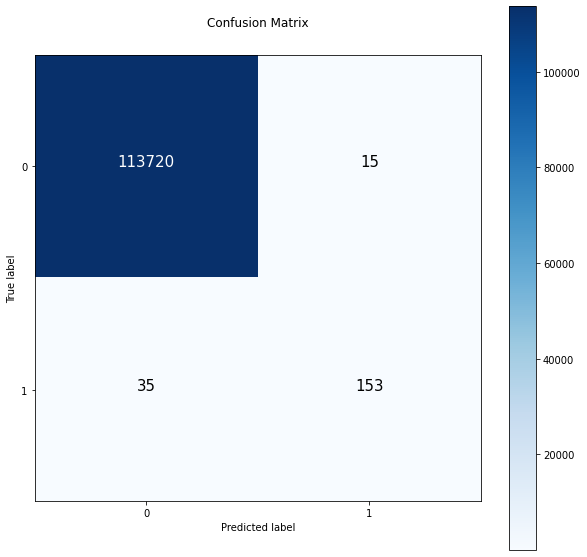

In [ ]:
su.make_confusion_matrix(y_test, y_pred_ws_7)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res71 = su.calculate_results(y_test, y_pred_ws_7)
res71

{'accuracy': 99.9561107063543,
 'f1': 0.9995487979031169,
 'precision': 0.9995454863310302,
 'recall': 0.999561107063543}

### 7.2. XGBoost Classifier with synthetic data

In [ ]:
model_s_7 = XGBClassifier()
model_s_7.fit(X_train_smote, y_train_smote)
y_pred_s_7 = model_s_7.predict(X_test)
acc_s_7 = accuracy_score(y_test, y_pred_s_7)
acc_s_7

0.9875529963220772

#### Confusion Matrix

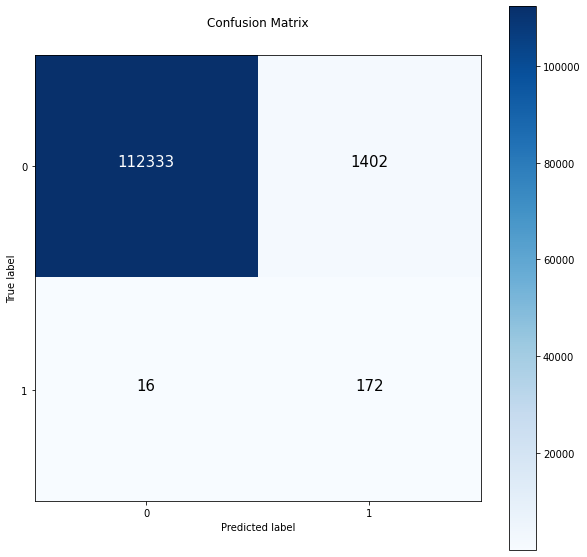

In [ ]:
su.make_confusion_matrix(y_test, y_pred_s_7)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res72 = su.calculate_results(y_test, y_pred_s_7)
res72

{'accuracy': 98.75529963220771,
 'f1': 0.9924102880560758,
 'precision': 0.9983879151042601,
 'recall': 0.9875529963220772}

# Comparing precision, accuracy f1 score and recall of all the models

In [ ]:
dp = pd.DataFrame([res11,res12,res21,res22,res31,res32,res41,res42,res51,res52,res61,res62,res71,res72],index=['1.1','1.2','2.1','2.2','3.1','3.2','4.1','4.2','5.1','5.2','6.1','6.2','7.1','7.2'])

In [ ]:
dp

,accuracy,precision,recall,f1
1.1,99.923633,0.999178,0.999236,0.999176
1.2,96.826804,0.998271,0.968268,0.982373
2.1,99.949966,0.999482,0.999500,0.999488
2.2,97.131396,0.998231,0.971314,0.983953
3.1,97.763402,0.998207,0.977634,0.987228
3.2,97.382443,0.998258,0.973824,0.985258
4.1,99.964889,0.999638,0.999649,0.999639
4.2,99.828832,0.998973,0.998288,0.998535
5.1,99.958744,0.999573,0.999587,0.999573
5.2,99.479473,0.998558,0.994795,0.996340
